# 오차 시각화하기

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

## 기본 오차 막대

<ErrorbarContainer object of 3 artists>

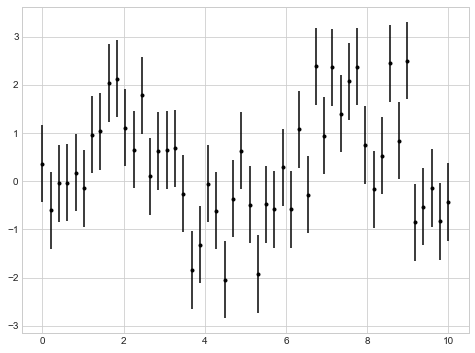

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.figure(figsize = (8, 6))
plt.errorbar(x, y, yerr = dy, fmt = '.k') # fmt는 점과 선 모양을 제어하는 포맷 코드

<ErrorbarContainer object of 3 artists>

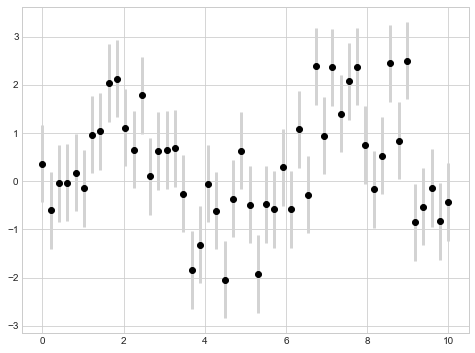

In [3]:
plt.figure(figsize = (8, 6))
plt.errorbar(x, y, yerr = dy, fmt = 'o', color = 'black', ecolor = 'lightgray', elinewidth = 3, capsize = 0)

## 연속 오차

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [5]:
# 모델을 정의하고 일부 데이터를 그림
model = lambda x : x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 가우시안 프로세스 적합 계산
# gp = GaussianProcess(corr = 'cubic', theta0 = 1e-2, thetaL = 1e-4, thetaU = 1E-1, random_start = 100)
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 1000)
# yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE = True)
yfit, y_std = gp.predict(xfit[:, np.newaxis], return_std = True)
dyfit = 2 * np.sqrt(y_std) # 2 * 시그마 ~ 95% 신뢰 구간

(-10.0, 35.0)

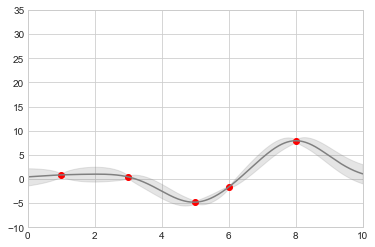

In [6]:
# 결과를 시각화
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color = 'gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color = 'gray', alpha = 0.2)
plt.xlim(0, 10)
plt.ylim(-10, 35)